# Network of Words - n-grams

In [1]:
import nltk
from nltk import bigrams
import pandas as pd
import numpy as np
import math
import pickle
import spacy
import time
import collections as clt
import matplotlib.pyplot as plt
from nltk.tokenize import sent_tokenize
from spellchecker import SpellChecker
import networkx as nx
from community import best_partition

In [2]:
sp = spacy.load('en_core_web_sm')
plt.rcParams["figure.figsize"] = (10,7) #defining size of plots

In [3]:
df = pd.read_csv('reviews_full_v7.csv')
df = df[df['Score'] >= 75]
df.reset_index(drop=True, inplace=True)
df

,User,Date,Year,Month,Release,Band,Score,Link,Album_link,Review_title,Genre,Text,Sentiment,Band_Genre,Combined_Genre
0,SpookyApparition,July 11 2002,2002,7,Chaosphere,Meshuggah,82,https://www.metal-archives.com/reviews/Meshugg...,https://www.metal-archives.com/albums/Meshugga...,Technical metal at it's finest.,technical thrash metal|math metal|progressive ...,I originally bought Chaosphere in late 2000......,0.9728,groove metal|thrash metal,technical thrash metal|math metal|progressive ...
1,SpookyApparition,July 14 2002,2002,7,Necroticism_-_Descanting_the_Insalubrious,Carcass,88,https://www.metal-archives.com/reviews/Carcass...,https://www.metal-archives.com/albums/Carcass/...,Carcass at their finest.,grindcore|melodic death metal,A midpoint between Carcass' early grind albums...,0.8479,grindcore|death metal,grindcore|melodic death metal
2,MarkRyan,July 15 2002,2002,7,Angels_Fall_First,Nightwish,90,https://www.metal-archives.com/reviews/Nightwi...,https://www.metal-archives.com/albums/Nightwis...,On par with their other stuff...,symphonic power metal,"I'm not hard-core into metal at all, really, b...",0.9951,symphonic metal|power metal,symphonic power metal
3,Fear,July 16 2002,2002,7,Dark_Genesis,Iced_Earth,87,https://www.metal-archives.com/reviews/Iced_Ea...,https://www.metal-archives.com/albums/Iced_Ear...,Brilliance in Repackaging,heavy metal|us power metal,"This is not a new album, but in fact, five alb...",0.9976,thrash metal|power metal,heavy metal|us power metal
4,Demented666,July 18 2002,2002,7,Extension_of_the_Wish,Andromeda,100,https://www.metal-archives.com/reviews/Androme...,https://www.metal-archives.com/albums/Andromed...,A smashing debut.,progressive metal,Andromeda's Extension of the Wish- clearly one...,0.8619,progressive metal,progressive metal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64636,TheStormIRide,June 30 2017,2017,6,Flying_Above_Ancient_Ruins,Krolok,85,https://www.metal-archives.com/reviews/Krolok/...,https://www.metal-archives.com/albums/Krolok/F...,Feverish Nightmares of Yore,atmospheric black metal,"Formed in 2011 by HV, Krolok is an atmospheric...",0.5875,black metal,atmospheric black metal
64637,6CORPSE6GRINDER6,June 30 2017,2017,6,Chemical_Assault,Violator,85,https://www.metal-archives.com/reviews/Violato...,https://www.metal-archives.com/albums/Violator...,"Take your life back, in the pit!",thrash metal,I don't have any issues with the retro-thrash ...,0.9976,thrash metal,thrash metal
64638,6CORPSE6GRINDER6,June 30 2017,2017,6,Violent_Mosh,Violator,80,https://www.metal-archives.com/reviews/Violato...,https://www.metal-archives.com/albums/Violator...,Officers are dirtier than the criminals they c...,thrash metal,This band was so important for the thrash meta...,0.9911,thrash metal,thrash metal
64639,Wacke,June 30 2017,2017,6,Resurrection,Chimaira,89,https://www.metal-archives.com/reviews/Chimair...,https://www.metal-archives.com/albums/Chimaira...,What doesn't kill us makes us stronger.,hard rock,Chimaira is arguably the most overlooked and/o...,0.9947,metalcore|groove metal,hard rock


In [4]:
all_bigrams = pickle.load(open('bigrams.p','rb'))

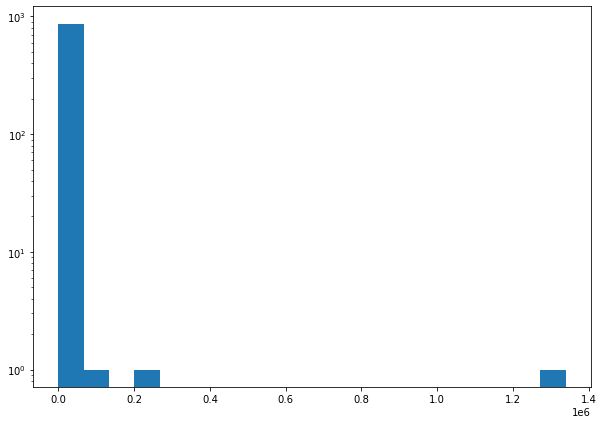

In [5]:
plt.hist(clt.Counter(all_bigrams.values()).values(), log = True, bins = 20)
plt.show()

In [6]:
len(all_bigrams)

1811502

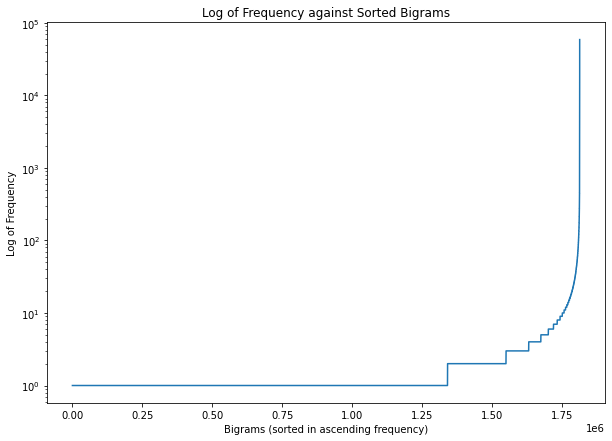

In [7]:
plt.title('Log of Frequency against Sorted Bigrams')
plt.ylabel('Log of Frequency')
plt.xlabel('Bigrams (sorted in ascending frequency)')
plt.semilogy(sorted(all_bigrams.values()))
plt.savefig('Log of Frequency against Sorted Bigrams.png')

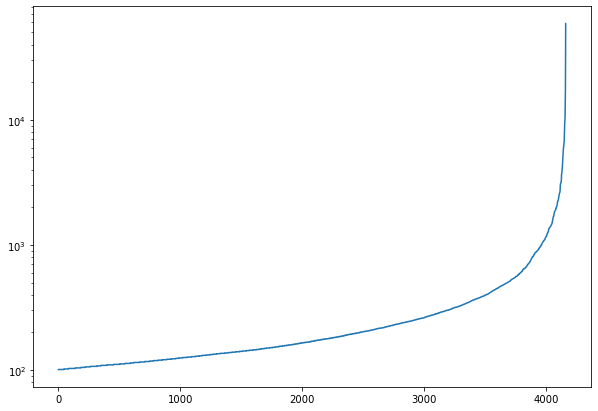

In [8]:
bigrams_new = {}
for bigram in all_bigrams:
    if all_bigrams[bigram] > 100:
        bigrams_new[bigram] = all_bigrams[bigram] 
plt.semilogy(sorted(bigrams_new.values()))

In [9]:
tmp = sorted([(bigrams_new[bigram],bigram) for bigram in bigrams_new], reverse = True)
len(tmp)

4164

In [11]:
G = nx.read_gpickle('network_bigrams.p')
B = nx.read_gpickle('bipartite_bigrams.p')

In [12]:
G.number_of_nodes(),G.number_of_edges(), nx.number_connected_components(G)

(4164, 7212793, 1)

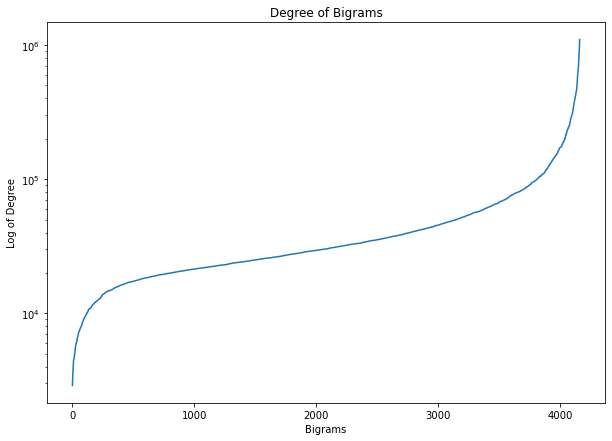

In [13]:
plt.title('Degree of Bigrams')
plt.ylabel('Log of Degree')
plt.xlabel('Bigrams')
plt.semilogy(sorted([G.degree(node, weight = 'weight') for node in G.nodes()]))
plt.savefig('Degree of Bigrams.png')
plt.show()

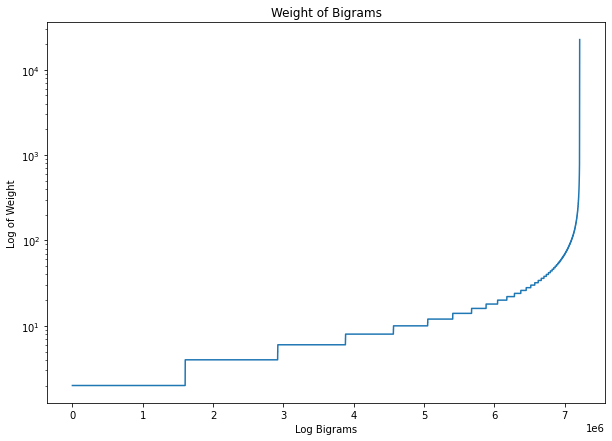

In [14]:
y_weight = sorted(list(nx.get_edge_attributes(G,'weight').values()))
plt.title('Weight of Bigrams')
plt.ylabel('Log of Weight')
plt.xlabel('Log Bigrams')
plt.semilogy(y_weight)
plt.savefig('Weight of Bigrams.png')
plt.show()

In [15]:
y_weight[1000000]

2

In [16]:
H = G.copy()
for u,v in G.edges():
    if G[u][v]['weight'] <= 100:
        G.remove_edge(u,v)
tmp = list(nx.isolates(G))
G.remove_nodes_from(tmp)

In [17]:
G.number_of_edges()

118102

In [18]:
partitions = best_partition(G, randomize = True, weight = 'weight')
clt.Counter(clt.Counter(partitions.values()).values())

Counter({450: 1,
         2922: 1,
         263: 1,
         172: 1,
         1: 132,
         8: 1,
         3: 2,
         23: 1,
         6: 1,
         2: 5})

In [20]:
print(clt.Counter(partitions.values()))

Counter({1: 2922, 0: 450, 2: 263, 3: 172, 32: 23, 10: 8, 37: 6, 20: 3, 42: 3, 54: 2, 89: 2, 97: 2, 104: 2, 121: 2, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 11: 1, 12: 1, 13: 1, 14: 1, 15: 1, 16: 1, 17: 1, 18: 1, 19: 1, 21: 1, 22: 1, 23: 1, 24: 1, 25: 1, 26: 1, 27: 1, 28: 1, 29: 1, 30: 1, 31: 1, 33: 1, 34: 1, 35: 1, 36: 1, 38: 1, 39: 1, 40: 1, 41: 1, 43: 1, 44: 1, 45: 1, 46: 1, 47: 1, 48: 1, 49: 1, 50: 1, 51: 1, 52: 1, 53: 1, 55: 1, 56: 1, 57: 1, 58: 1, 59: 1, 60: 1, 61: 1, 62: 1, 63: 1, 64: 1, 65: 1, 66: 1, 67: 1, 68: 1, 69: 1, 70: 1, 71: 1, 72: 1, 73: 1, 74: 1, 75: 1, 76: 1, 77: 1, 78: 1, 79: 1, 80: 1, 81: 1, 82: 1, 83: 1, 84: 1, 85: 1, 86: 1, 87: 1, 88: 1, 90: 1, 91: 1, 92: 1, 93: 1, 94: 1, 95: 1, 96: 1, 98: 1, 99: 1, 100: 1, 101: 1, 102: 1, 103: 1, 105: 1, 106: 1, 107: 1, 108: 1, 109: 1, 110: 1, 111: 1, 112: 1, 113: 1, 114: 1, 115: 1, 116: 1, 117: 1, 118: 1, 119: 1, 120: 1, 122: 1, 123: 1, 124: 1, 125: 1, 126: 1, 127: 1, 128: 1, 129: 1, 130: 1, 131: 1, 132: 1, 133: 1, 134: 1, 135: 1, 136

In [23]:
for word in partitions:
    if partitions[word] == 2:
        print(word)

('metal', 'albums')
('guitar', 'driven')
('later', 'releases')
('guitar', 'solo')
('excellent', 'song')
('guitar', 'solos')
('pay', 'attention')
('fastest', 'song')
('previous', 'songs')
('single', 'track')
('favorite', 'album')
('lead', 'singer')
('dual', 'guitar')
('power', 'metal')
('powerful', 'vocals')
('way', 'better')
('melodic', 'power')
('guitar', 'duo')
('melodic', 'speed')
('speed', 'metal')
('worth', 'noting')
('great', 'chorus')
('heavy', 'power')
('electric', 'guitars')
('solo', 'work')
('vocal', 'parts')
('actually', 'pretty')
('previous', 'work')
('fast', 'songs')
('debut', 'album')
('burnt', 'offerings')
('great', 'solos')
('faster', 'songs')
('iced', 'earth')
('power', 'speed')
('speed', 'power')
('seventh', 'son')
('grave', 'digger')
('king', 'diamond')
('album', 'sound')
('great', 'metal')
('metal', 'head')
('little', 'bit')
('riffs', 'like')
('intro', 'track')
('speed', 'riffs')
('great', 'thing')
('classic', 'album')
('pitched', 'vocals')
('great', 'track')
('albu

In [19]:
#nx.write_gpickle(G,'network_bigrams_sim.p') 
#nx.write_gpickle(DG,'disjointed_bigrams.p') 